# Setup

In [2]:
import numpy as np
from PIL import Image
import time
import math
import wandb
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from common import transfer_functions, utils

In [2]:
def Epoch(img, s, w_i_h, w_h_o, b_i_h, b_h_o):
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img
    h = transfer_functions.sigmoid(h_pre)
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = transfer_functions.sigmoid(o_pre)

    # Backpropagation output -> hidden (cost function ddverivative)
    delta_o = o - s  # cross_entropy(s, o) * o
    w_h_o += -learn_rate * delta_o @ np.transpose(h)
    b_h_o += -learn_rate * delta_o

    # Backpropagation hidden -> input (activation function derivative)
    delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
    w_i_h += -learn_rate * delta_h @ np.transpose(img)
    b_i_h += -learn_rate * delta_h
    return w_i_h, w_h_o, b_i_h, b_h_o

In [100]:
def evaluate(img, s, w_i_h, w_h_o, b_i_h, b_h_o):

    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img
    h = transfer_functions.sigmoid(h_pre)
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = transfer_functions.sigmoid(o_pre)

    return o

# Train Model

In [126]:
dataset = "MazesSolves11"
Model_name = 

mazes, solves = utils.load_data("datasets/{dataset}.pickle")

input_layer_size = 121
hidden_layer_size = 100
output_layer_size = 121

learn_rate = 0.01
epochs = 100

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="MazeSolver",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": learn_rate,
    "hidden_layer_sizes": [100],
    "dataset": dataset,
    "activation": "Sigmoid":
    "epochs": epochs,
    },
)


# weights = w, biases = b, input = i, hidden = h, output = o
# w_i_h = weights input to hidden

# Initialize layers
w_i_h = np.random.uniform(-0.5, 0.5, (hidden_layer_size, input_layer_size))
w_h_o = np.random.uniform(-0.5, 0.5, (output_layer_size, hidden_layer_size))
b_i_h = np.zeros((hidden_layer_size, 1))
b_h_o = np.zeros((output_layer_size, 1))

for epocho in range(epochs):
    for index in range(len(mazes) - 5000):
        img, s = mazes[index], solves[index]
        img.shape += (1,)
        s.shape += (1,)
        w_i_h, w_h_o, b_i_h, b_h_o = Epoch(img, s, w_i_h, w_h_o, b_i_h, b_h_o)
    
    factor = 10
    average_score = []
    loss = []

    for index in range(-1, -5000, -1):
        img, s = mazes[index], solves[index]
        img.shape += (1,)
        s.shape += (1,)
        s_pred = evaluate(img, s, w_i_h, w_h_o, b_i_h, b_h_o))

        average = 1 - abs(s - s_pred).mean()
        score = math.exp((average-1)*factor)*average
        
        loss.append(log_loss(s, s_pred))

    mean_acc = np.mean(average_score)*100
    highest_acc = np.amax(average_score) * 100
    lowest_acc = np.amin(average_score) * 100
    mean_loss = np.mean(loss)
    wandb.log({
        "Accuracy": mean_acc,
        "Loss": mean_loss 
        })


    # Show accuracy for this epoch
    print(f"Epoch #{epocho} Mean Acc: {round(mean_acc, 3)}% Highest Acc: {round(highest_acc, 3)}% Lowest Acc: {round(lowest_acc), 3}%")
    print(f"Index High: {average_score.index(np.amax(average_score))} Index Low: {average_score.index(np.amin(average_score))}")

wandb.finish()
utils.store_model("models/{Model_name}.pickle", w_i_h, w_h_o, b_i_h, b_h_o)

Epoch #0 Mean Acc: 40.48726907709837% Highest Acc: 85.20537328132971% Lowest Acc: 9.614901760904619%
Index High: 1083 Index Low: 960
Epoch #1 Mean Acc: 49.481776373635604% Highest Acc: 92.74426758755251% Lowest Acc: 10.763342939294374%
Index High: 1083 Index Low: 4612
Epoch #2 Mean Acc: 54.212393665831435% Highest Acc: 96.48650988254906% Lowest Acc: 12.044116455663222%
Index High: 942 Index Low: 2235
Epoch #3 Mean Acc: 57.53081031158307% Highest Acc: 97.7447252396554% Lowest Acc: 12.070826920971838%
Index High: 942 Index Low: 2939
Epoch #4 Mean Acc: 60.65231296375313% Highest Acc: 98.24776001933186% Lowest Acc: 12.475577391820632%
Index High: 942 Index Low: 2939
Epoch #5 Mean Acc: 63.058108528209026% Highest Acc: 98.68193920689701% Lowest Acc: 13.196430198119224%
Index High: 942 Index Low: 2939
Epoch #6 Mean Acc: 64.83543073837865% Highest Acc: 98.78971741230721% Lowest Acc: 13.424996166092798%
Index High: 942 Index Low: 4612
Epoch #7 Mean Acc: 66.3419894784421% Highest Acc: 98.7271380

# Load Model

In [97]:
w_i_h, w_h_o, b_i_h, b_h_o = utils.load_model("models/11x11MazeModel.pickle", 3)

# Model Testing

73.27809652150397


<Figure size 640x480 with 0 Axes>

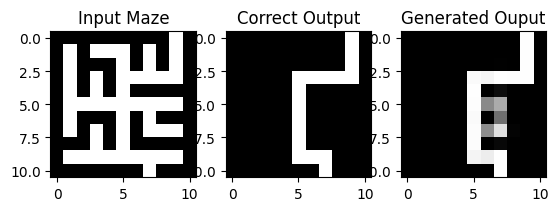

In [144]:
# Last Thousand images are not used in training
test_index = 3456

# Extract Maze
maze = mazes[test_index]
solve = solves[test_index]
maze.shape += (1,)
solve.shape += (1,)

# Forward propagation input -> hidden
h_pre = b_i_h + w_i_h @ maze
h = transfer_functions.sigmoid(h_pre)
# Forward propagation hidden -> output
o_pre = b_h_o + w_h_o @ h
o = transfer_functions.sigmoid(o_pre)

# Show Output
reshaped_maze = 255 - maze.reshape(11, 11) * 255
reshaped_solve = solve.reshape(11, 11) * 255
reshaped_o = o.reshape(11, 11) * 255

maze_img = Image.fromarray(reshaped_maze)
solve_img = Image.fromarray(reshaped_solve)
o_img = Image.fromarray(reshaped_o)

# Creat Plot
plt.figure()
f, axarr = plt.subplots(1,3) 

axarr[0].title.set_text("Input Maze")
axarr[0].imshow(maze_img)
axarr[1].title.set_text("Correct Output")
axarr[1].imshow(solve_img)
axarr[2].title.set_text("Generated Ouput")
axarr[2].imshow(o_img)

average = 1 - abs(solve - o).mean()
factor = 10
score = math.exp((average-1)*factor)*average

print(score * 100)


<Figure size 640x480 with 0 Axes>

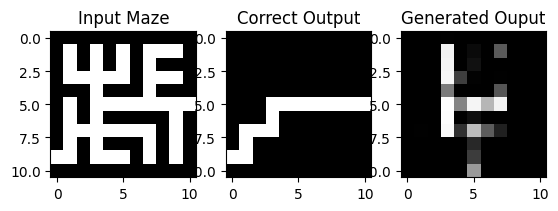

In [147]:
'''
mazeImg = Image.open("testMAze.png").convert('L')
maze = 1 - np.array(mazeImg)/255
print(maze)
maze = maze.flatten()
maze.shape += (1,)
print(maze.shape)
'''
# Last Thousand images are not used in training
test_index = -20

# Extract Maze
maze = mazes[test_index].reshape(11, 11)
solve = solves[test_index].reshape(11, 11)
maze = maze.T
solve = solve.T

maze = maze.flatten()
solve = solve.flatten()

maze.shape += (1,)
solve.shape += (1,)

# Forward propagation input -> hidden
h_pre = b_i_h + w_i_h @ maze
h = transfer_functions.sigmoid(h_pre)
# Forward propagation hidden -> output
o_pre = b_h_o + w_h_o @ h
o = transfer_functions.sigmoid(o_pre)

# Show Output
reshaped_maze = 255 - maze.reshape(11, 11) * 255
reshaped_solve = solve.reshape(11, 11) * 255
reshaped_o = o.reshape(11, 11) * 255

maze_img = Image.fromarray(reshaped_maze)
solve_img = Image.fromarray(reshaped_solve)
o_img = Image.fromarray(reshaped_o)

# Creat Plot
plt.figure()
f, axarr = plt.subplots(1,3) 

axarr[0].title.set_text("Input Maze")
axarr[0].imshow(maze_img)
axarr[1].title.set_text("Correct Output")
axarr[1].imshow(solve_img)
axarr[2].title.set_text("Generated Ouput")
axarr[2].imshow(o_img)